<div align="center">
  <img width="600px" src="https://www.collinsdictionary.com/images/full/baseball_557405302_1000.jpg">
</div>

# Baseball Salary Predict

**Authors**:
- Cristhian Castillo
- Kevin Zarama
- Aura Rivera
- Jesus Gomez

In this notebook we are going to build clusters with the characteristics of the players

**Notebook Objetive**: Create groups of players given their characteristics.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Packages-and-Functions" data-toc-modified-id="Packages-and-Functions-1">Packages and Functions</a></span><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-1.1">Packages</a></span></li><li><span><a href="#Custom-Functions" data-toc-modified-id="Custom-Functions-1.2">Custom Functions</a></span></li></ul></li><li><span><a href="#Load-datasets" data-toc-modified-id="Load-datasets-2">Load datasets</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-3">Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Remove-Variables" data-toc-modified-id="Remove-Variables-3.1">Remove Variables</a></span></li><li><span><a href="#Separation-of-variables" data-toc-modified-id="Separation-of-variables-3.2">Separation of variables</a></span></li><li><span><a href="#One-Hot-Encoder" data-toc-modified-id="One-Hot-Encoder-3.3">One Hot Encoder</a></span></li></ul></li><li><span><a href="#Intrinsic-Dimension" data-toc-modified-id="Intrinsic-Dimension-4">Intrinsic Dimension</a></span><ul class="toc-item"><li><span><a href="#Pipeline-build" data-toc-modified-id="Pipeline-build-4.1">Pipeline build</a></span></li><li><span><a href="#PCA-Features" data-toc-modified-id="PCA-Features-4.2">PCA Features</a></span></li><li><span><a href="#PC-Visualitations" data-toc-modified-id="PC-Visualitations-4.3">PC Visualitations</a></span></li><li><span><a href="#Explained-Variance" data-toc-modified-id="Explained-Variance-4.4">Explained Variance</a></span></li></ul></li><li><span><a href="#PC-Data" data-toc-modified-id="PC-Data-5">PC Data</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-6">Clustering</a></span><ul class="toc-item"><li><span><a href="#Best-k" data-toc-modified-id="Best-k-6.1">Best k</a></span></li><li><span><a href="#Making-Clusters" data-toc-modified-id="Making-Clusters-6.2">Making Clusters</a></span></li></ul></li><li><span><a href="#Clusters-analysis" data-toc-modified-id="Clusters-analysis-7">Clusters analysis</a></span></li></ul></div>

## Packages and Functions

### Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

### Custom Functions

In [2]:
import sys
sys.path.append("utils/")
import importlib

In [3]:
from custom_data_preprocessing import get_cols_by_type, one_hot_encoder
from custom_graphs import biplot

## Load datasets

In [4]:
df = pd.read_csv("datasets/Baseball_Clean.csv")

## Data Preparation

### Remove Variables

In [5]:
players = df['Player']

In [6]:
df = df.drop(["Player", "Unnamed: 0"], axis=1)

### Separation of variables

In [7]:
y = df["Salary"]
X = df.drop(["Salary"], axis=1)

### One Hot Encoder

We do One Hot Encoder in the categorical variables to train the models.

In [8]:
cat_cols, num_cols =  get_cols_by_type(X)

In [9]:
X = one_hot_encoder(X, cat_cols, drop_first=True)

## Intrinsic Dimension

First we will find the intrinsic dimension

### Pipeline build

In [10]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)

### PCA Features

In [11]:
pca_features = pipeline.fit_transform(X)

###  PC Visualitations

In [12]:
pca_features.shape

(263, 19)

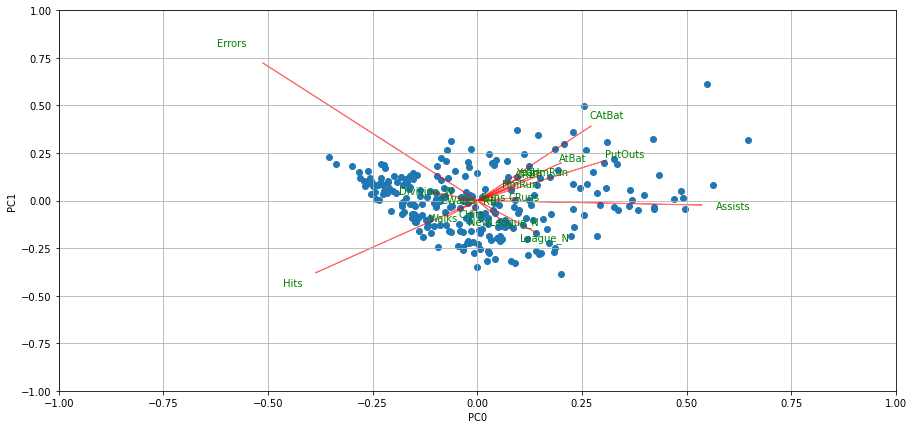

In [13]:
biplot(pca_features[:,:10], pca.components_, 0, 1, X.columns)

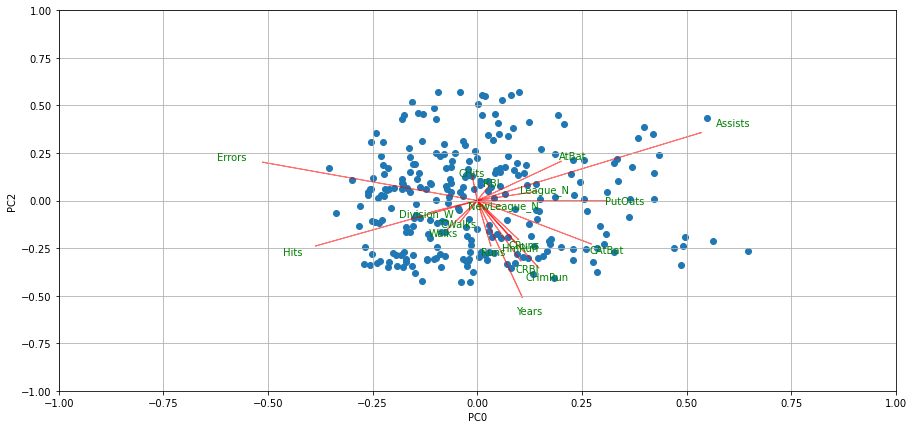

In [14]:
biplot(pca_features[:,:10], pca.components_, 0, 2, X.columns)

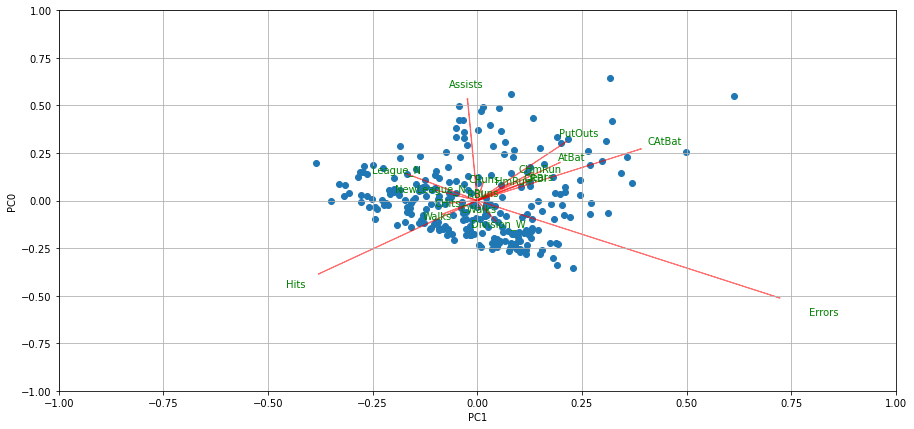

In [15]:
biplot(pca_features[:,:10], pca.components_, 1, 0, X.columns)

With the above we have given an idea of what are the most important components that influence the data.

We already have an idea of the most significant variables but now we review the most positive and negative values of each original variable in each component to make it easier to understand.

In [16]:
components_index = []

for i in range(0, len(X.columns)):
    components_index.append('PC'+ str(i))

components = pd.DataFrame(data=pca.components_, columns=X.columns, index=components_index)

In [17]:
for i in range(0, len(X.columns)):
  print('[+]')
  print(components.transpose()['PC'+ str(i)].sort_values(ascending=False)[:5])
  print('[-]')
  print(components.transpose()['PC'+ str(i)].sort_values()[:5])
  print("---------------------------------------")

[+]
CRBI      0.340343
CRuns     0.338208
CHits     0.330742
CAtBat    0.330463
CHmRun    0.318979
Name: PC0, dtype: float64
[-]
League_N      -0.054471
NewLeague_N   -0.041910
Division_W    -0.025725
Errors        -0.007859
Assists       -0.000842
Name: PC0, dtype: float64
---------------------------------------
[+]
Years     0.262402
CAtBat    0.192904
CWalks    0.192315
CHits     0.182899
CRuns     0.172276
Name: PC1, dtype: float64
[-]
AtBat   -0.383784
Runs    -0.377721
Hits    -0.377271
RBI     -0.314531
HmRun   -0.237136
Name: PC1, dtype: float64
---------------------------------------
[+]
League_N       0.547725
NewLeague_N    0.544582
Assists        0.397871
Errors         0.382850
AtBat          0.088626
Name: PC2, dtype: float64
[-]
HmRun        -0.216186
CHmRun       -0.086272
RBI          -0.073085
Runs         -0.017166
Division_W   -0.016201
Name: PC2, dtype: float64
---------------------------------------
[+]
Assists    0.524053
Errors     0.421917
Years      0.095312
C

### Explained Variance 

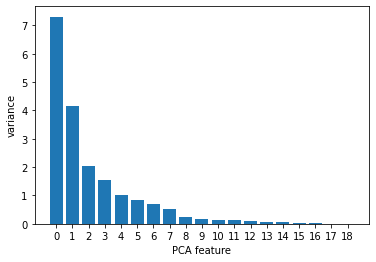

In [18]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [19]:
var_exp = pca.explained_variance_ratio_

In [20]:
np.cumsum(var_exp)

array([0.3831424 , 0.60155315, 0.70841675, 0.79034194, 0.84290275,
       0.88634779, 0.92262888, 0.94963043, 0.96282691, 0.97255413,
       0.97977754, 0.986487  , 0.99151787, 0.99473033, 0.99746591,
       0.99893988, 0.99968159, 0.99993751, 1.        ])

In [21]:
num_var = 0
cumsum = 0
while cumsum < 0.95:
    cumsum += var_exp[num_var]
    num_var += 1

In [22]:
num_var

9

In [23]:
cumsum

0.9628269123520309

With 9 variables we explain 95% of the variance.

Let's see it graphically

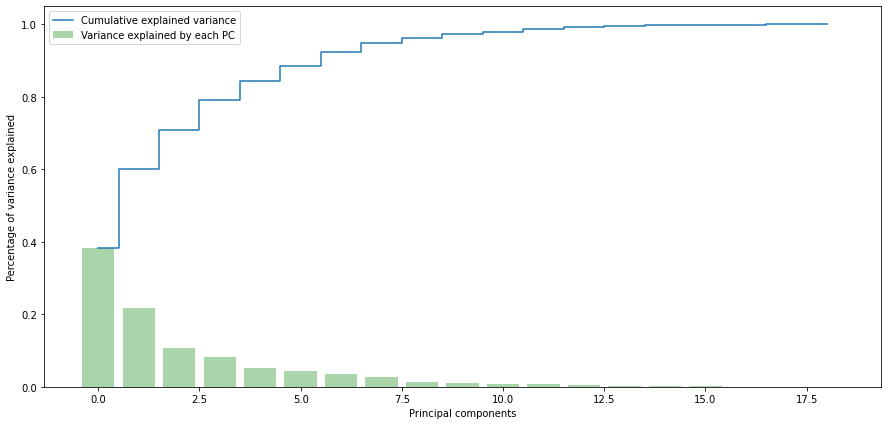

In [24]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.3333, align='center', label='Variance explained by each PC', color = 'g')
plt.step(range(len(np.cumsum(pca.explained_variance_ratio_))), np.cumsum(pca.explained_variance_ratio_), where='mid',label='Cumulative explained variance')
plt.ylabel('Percentage of variance explained')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

## PC Data

In [25]:
X_reducted = pd.DataFrame(pca_features)
X_reducted = X_reducted.loc[:,:8]

In [26]:
X_reducted

,0,1,2,3,4,5,6,7,8
0,-0.009649,1.870522,1.265145,-0.935481,1.109636,1.211972,-0.065146,-0.098249,-0.252423
1,0.411434,-2.429422,-0.909193,-0.264212,1.232031,1.826617,0.359893,-1.199383,-0.371820
2,3.466822,0.825947,0.555469,-1.616726,-0.857488,-1.028712,-0.999385,0.844247,0.197379
3,-2.558317,-0.230984,0.519642,-2.176251,-0.820301,1.491696,-0.276141,0.207094,0.414956
4,1.027702,-1.573537,1.331382,3.494004,0.983427,0.513675,0.140456,0.989707,-0.661933
...,...,...,...,...,...,...,...,...,...
258,-0.331167,-0.165663,0.775890,-1.536702,-1.035016,-0.306299,0.552371,1.184243,-0.246646
259,3.246183,-0.543315,1.209150,2.754023,-1.197520,0.834749,1.969884,-1.371907,-0.543945
260,-1.094609,-0.751386,-0.935937,1.072347,0.705912,-0.644482,1.496147,0.287111,-0.304373
261,1.977682,-2.184517,-0.282012,-0.216874,-0.694872,3.514692,1.142097,-0.230697,-0.240990


We now have a data set that explains 95% of the original variance

## Clustering

### Best k

We will find the best k betweet 3 and 5 using inertia, for this we will graph the values from 1 to 8. To avoid choosing the average value between 3 and 5.

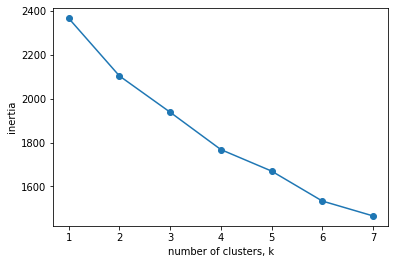

In [27]:
ks = range(1, 8)
inertias = []

for k in ks:
    scaler = StandardScaler()
    kmeans = KMeans(n_clusters=k)
    pipeline = make_pipeline(scaler, kmeans)
    pipeline.fit(X_reducted)
   
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

The best option is k=5

### Making Clusters

In [28]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=5)

pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(X_reducted)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=5))])

In [29]:
labels = pipeline.predict(X_reducted)

In [30]:
df_clusters = pd.DataFrame({'players': players, 'labels': labels})

In [31]:
df_clusters

,players,labels
0,Alan Ashby,3
1,Alvin Davis,3
2,Andre Dawson,1
3,Andres Galarraga,3
4,Alfredo Griffin,4
...,...,...
258,Willie McGee,1
259,Willie Randolph,4
260,Wayne Tolleson,2
261,Willie Upshaw,3


In [32]:
df_clusters.sort_values(['labels'])

,players,labels
69,Darryl Strawberry,0
91,Graig Nettles,0
53,Doug DeCinces,0
186,Pete Incaviglia,0
79,George Bell,0
...,...,...
229,Steve Sax,4
27,Brook Jacoby,4
233,Tony Fernandez,4
86,Greg Gagne,4


We already have the players classified in groups.

## Clusters analysis

In [38]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [34]:
df["Salary"] = y
df["Label"] = labels

In [39]:
df.groupby(['Label']).mean().transpose()

Label,0,1,2,3,4
AtBat,502.28,325.84,333.38,448.68,524.08
Hits,132.47,87.12,88.29,121.13,141.57
HmRun,25.42,7.99,8.36,15.35,9.43
Runs,78.14,43.19,44.04,59.19,68.06
RBI,84.31,39.86,38.27,63.55,57.16
Walks,64.06,32.32,29.78,50.81,48.55
Years,9.67,6.80,6.83,8.35,6.41
CAtBat,4186.92,2210.22,2107.21,3332.52,2612.86
CHits,1129.53,600.59,566.67,932.58,708.59
CHmRun,179.50,45.72,47.90,95.16,38.92


- **Cluster 0**: 
    - Has the second highest average salary.
    - Has the highest HmRun average in 1986.
    - Has the highest RBI and RBI in 1986.
    - Has the highest average base on balls (walks) in 1986.
    - Has the highest average number of years as a professional.
    - He has the highest individual statistics of his professional career.
    - They are players with a long career in baseball, who have great statistics during the 1986 league.

- **Cluster 1**:
    - They are players with a not so extensive trajectory in their professional career.
    - His league stats are very similar to cluster 2, only slightly smaller in some respects.
    - Their statistics during the professional career, are also similar to those of cluster 2. Highlighting a higher value in CAtBat, so they can be players with more batting experience than cluster 2
    - Has superior statistics in terms of runs and batting with respect to group 2.
    - They can be experienced hitters, but who still have a track record, who have good statistics related to runs.

- **Cluster 2**:
    - It has very similar statistics to cluster 1, but nevertheless earn less than the players in that cluster.
    - They have a greater number of PutOuts, so they can be defensive players.
    - They make fewer mistakes, which can also be reflected because they are players who do not have such a long career.
    - During the league in some aspects it has higher statistics than cluster 2, but it is the opposite case for the statistics on the career. This may explain the salary difference.
    
- **Cluster 3**: 
    - They are the group with the second highest average salary.
    - It has slightly less experience than cluster 0.
    - It is a cluster of players with a career in the sport, but whose statistics are below the best paid.
    
- **Cluster 4**: 
    - The cluster of promises could be considered.
    - It is a cluster with a higher salary than clusters 1 and 2, despite having fewer years of career.
    - We consider them promising because their statistics are higher than clusters 1 and 2. And in some cases it resembles and exceeds cluster 3, which is the second best-paid cluster with the longest track record.
    - It is a group of players with less experience that equals and exceeds the statistics of more experienced players and that far exceeds the statistics of other groups with the same professional career time.